In [1]:
from __future__ import print_function

#%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

import re
import csv
import time
import struct
import math

In [2]:
# Routine to determine if a name is located in a list. If not it
# returns -1.  If the string does exist it returns the number in the
# list where it is located.
def determinePosition(header,title) :
    for column in header:
        if(title==column):
            return(header.index(column))
    return(None)

def insertRow(cPos,mPos,allData,line,TOLERANCE=1.0E-5):
    currentRow = 0
    for row in allData:
        if(numpy.fabs(row[cPos]-line[cPos])<TOLERANCE):
            if(row[mPos]>line[mPos]):
                allData.insert(currentRow,line)
                return
        elif(row[cPos]>line[cPos]):
            allData.insert(currentRow,line)
            return
        currentRow += 1
    allData.append(line)

def readApprox(filename):
    fp = open(filename,"r")
    csvFile = csv.reader(fp,delimiter=",")
    
    header = next(csvFile)
    cPos = determinePosition(header,'c')
    mPos = determinePosition(header,'m')
    maxButterflyPosLeft  = determinePosition(header,'maxButterflyLeft')
    minButterflyPosLeft  = determinePosition(header,'minButterflyLeft')
    maxButterflyPosRight = determinePosition(header,'maxButterflyRight')
    minButterflyPosRight = determinePosition(header,'minButterflyRight')

    
    numRows = 0
    allData = []
    approx = numpy.arange(0)
    for line in csvFile:
        for lupe in range(len(line)):
            try:
                line[lupe] = numpy.maximum(numpy.array(line[lupe],dtype=numpy.float64),0.0)
            except ValueError:
                pass
        #insertRow(cPos,mPos,allData,line)
        allData.append(line)
        numRows += 1

    fp.close()
    
    return(cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight,allData)



In [3]:
#[cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight,allData] = \
#    readApprox('../build-butterflyVWaspPDE-Desktop-Debug/maxMin-c-m.csv')

filename = './build-butterflyVWaspPDE-Desktop-Debug/maxMin-c-m-full.csv'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/maxMin-c-m-full-mu-0.2.csv'
#filename = '../build-butterflyVWaspPDE-Desktop-Debug/maxMin-c-m-full-mu-0.4.csv'
filename = '/tmp/results.csv'

[cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight,allData] = \
    readApprox(filename)

#print(cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight)
#for line in allData:
#    print(line[cPos],line[mPos],line[maxButterflyPosLeft],line[minButterflyPosLeft],line[maxButterflyPosRight],line[minButterflyPosRight])

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%matplotlib notebook

In [5]:
def insertNewValue(numberList,newNumber,TOLERANCE=1.0e-5):
    # Routine to insert a new number into a list so that the resulting
    # list is in ascending order and the entries are unique.
    
    for lupe in range(len(numberList)):
        if(math.fabs(numberList[lupe]-newNumber)<=TOLERANCE):
            return
        elif(numberList[lupe]>newNumber):
            numberList.insert(lupe,newNumber)
            return
    numberList.append(newNumber)

def makeDomain(allData,cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight):
    #print(allData)
    
    # Assume there will be one row and one column of c's and m's
    # prevx 
    mVals = []
    cVals = []
    for line in allData:
        insertNewValue(mVals,line[mPos])
        insertNewValue(cVals,line[cPos])
        
    numX = len(mVals)
    numY = len(cVals)
    maxLeft  = numpy.zeros((numX,numY))
    minLeft  = numpy.zeros((numX,numY))
    maxRight = numpy.zeros((numX,numY))
    minRight = numpy.zeros((numX,numY))
    for line in allData:
        i = mVals.index(line[mPos])
        j = cVals.index(line[cPos])
        maxLeft[i][j]  = numpy.fabs(line[maxButterflyPosLeft])
        minLeft[i][j]  = numpy.fabs(line[minButterflyPosLeft])
        maxRight[i][j] = numpy.fabs(line[maxButterflyPosRight])
        minRight[i][j] = numpy.fabs(line[minButterflyPosRight])
                
    mVals  = numpy.array(mVals)
    cVals  = numpy.array(cVals)
    #print(numX,numY,len(allData))
    return(cVals,mVals,maxLeft,minLeft,maxRight,minRight)

[cVals,mVals,maxLeft,minLeft,maxRight,minRight] = makeDomain(allData,cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight)
#print(cVals)
#print(mVals)
#print(maxLeft)


<IPython.core.display.Javascript object>


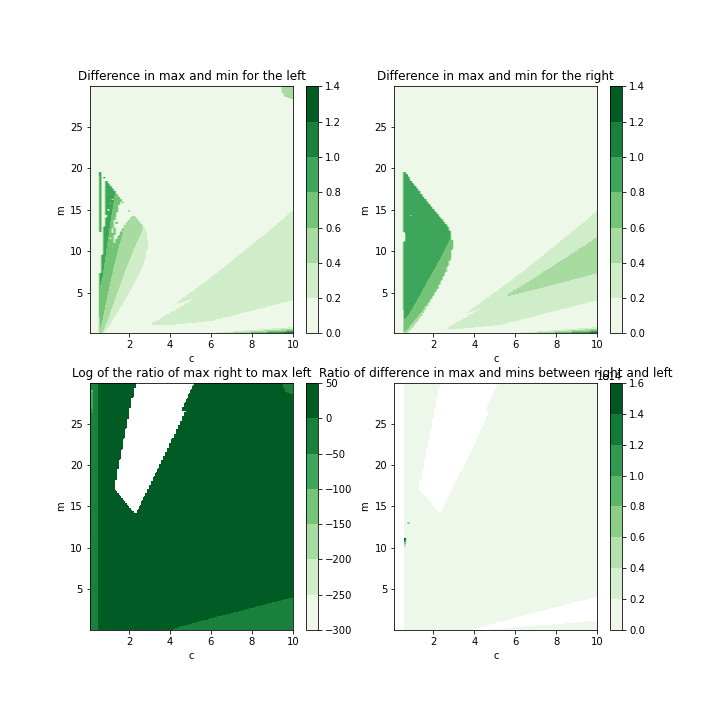

<ipython-input-6-51902acb4be9>:33: RuntimeWarning: divide by zero encountered in true_divide
  cp = axes[1][0].contourf(cGrid,mGrid,numpy.log(maxRight/maxLeft),cmap='Greens') #gist_yarg Greens BuGn
<ipython-input-6-51902acb4be9>:42: RuntimeWarning: divide by zero encountered in true_divide
  cp = axes[1][1].contourf(cGrid,mGrid,(maxRight-minRight)/(maxLeft-minLeft),cmap='Greens') #gist_yarg Greens BuGn
<ipython-input-6-51902acb4be9>:42: RuntimeWarning: invalid value encountered in true_divide
  cp = axes[1][1].contourf(cGrid,mGrid,(maxRight-minRight)/(maxLeft-minLeft),cmap='Greens') #gist_yarg Greens BuGn


In [6]:
[cPos,mPos,
 maxButterflyPosLeft,minButterflyPosLeft,
 maxButterflyPosRight,minButterflyPosRight,allData] = \
    readApprox(filename)
[cVals,mVals,maxLeft,minLeft,maxRight,minRight] = makeDomain(allData,cPos,mPos,maxButterflyPosLeft,minButterflyPosLeft,maxButterflyPosRight,minButterflyPosRight)
[cGrid,mGrid] = numpy.meshgrid(cVals,mVals)

#fig = plt.figure()
#fig.subplots_adjust(left=0,bottom=0.0,top=1.0,right=1.0) #bottom=-3.0,top=1.0)

fig, axes = plt.subplots(2,2,figsize=(10,10))
#axes[0][0].contour(cGrid,mGrid,maxLeft-minLeft)  #gist_yarg Greens BuGn
#cp = axes[0][0].imshow(maxLeft-minLeft, cmap='Greens', origin='lower', aspect='auto',
#           extent=[cGrid.min(), cGrid.max(), mGrid.min(), mGrid.max()])
cp = axes[0][0].contourf(cGrid,mGrid,maxLeft-minLeft,
                        extent=[cGrid.min(), cGrid.max(), mGrid.min(), mGrid.max()],
                        cmap='Greens')  #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[0][0]) # Add a colorbar to a plot
axes[0][0].set_title('Difference in max and min for the left')
xlabel = axes[0][0].set_xlabel('c')
yLabel = axes[0][0].set_ylabel('m')

#axes1 = fig.add_subplot(2, 2, 2)
cp = axes[0][1].contourf(cGrid,mGrid,maxRight-minRight,cmap='Greens')  #gist_yarg Greens BuGn
#cp = axes[0][1].imshow(maxRight-minRight, cmap='Greens', origin='lower', aspect='auto',
#           extent=[cGrid.min(), cGrid.max(), mGrid.min(), mGrid.max()])
fig.colorbar(cp,ax=axes[0][1]) # Add a colorbar to a plot
axes[0][1].set_title('Difference in max and min for the right')
xlabel = axes[0][1].set_xlabel('c')
yLabel = axes[0][1].set_ylabel('m')

#axes2 = fig.add_subplot(2, 2, 3)
cp = axes[1][0].contourf(cGrid,mGrid,numpy.log(maxRight/maxLeft),cmap='Greens') #gist_yarg Greens BuGn
#cp = axes[1][0].imshow(numpy.log(maxRight/maxLeft), cmap='Greens', origin='lower', aspect='auto',
#           extent=[cGrid.min(), cGrid.max(), mGrid.min(), mGrid.max()])
fig.colorbar(cp,ax=axes[1][0]) # Add a colorbar to a plot
axes[1][0].set_title('Log of the ratio of max right to max left')
xlabel = axes[1][0].set_xlabel('c')
yLabel = axes[1][0].set_ylabel('m')

#axes3 = fig.add_subplot(2, 2, 4)
cp = axes[1][1].contourf(cGrid,mGrid,(maxRight-minRight)/(maxLeft-minLeft),cmap='Greens') #gist_yarg Greens BuGn
#cp = axes[1][1].imshow((maxRight-minRight)/(maxLeft-minLeft),cmap='Greens', origin='lower', aspect='auto',
#           extent=[cGrid.min(), cGrid.max(), mGrid.min(), mGrid.max()])
fig.colorbar(cp,ax=axes[1][1]) # Add a colorbar to a plot
axes[1][1].set_title('Ratio of difference in max and mins between right and left')
xlabel = axes[1][1].set_xlabel('c')
yLabel = axes[1][1].set_ylabel('m')

plt.show()
#fig.savefig('/tmp/trial.pdf', dpi=60, bbox_inches='tight')

<IPython.core.display.Javascript object>


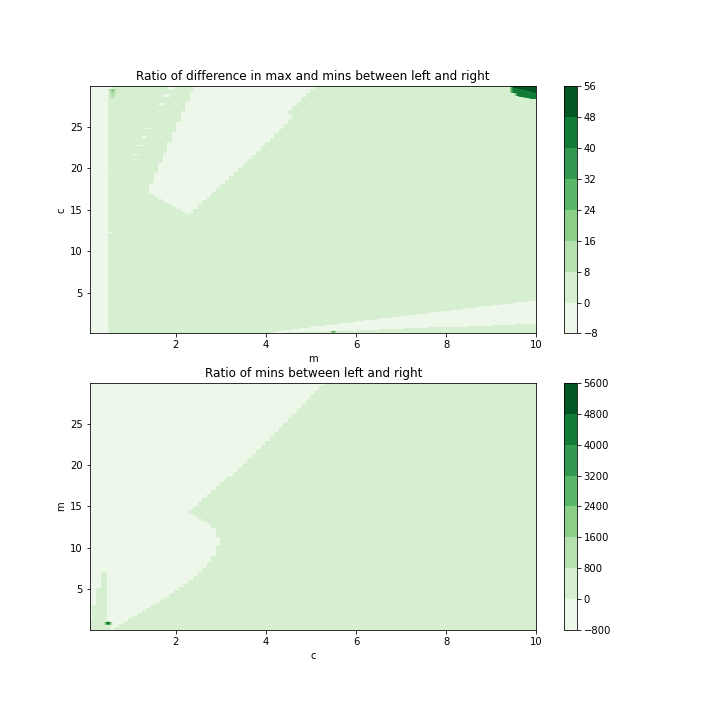

In [7]:

[cVals,mVals,maxLeft,minLeft,maxRight,minRight] = \
    makeDomain(allData,cPos,mPos, \
               maxButterflyPosLeft,minButterflyPosLeft, \
               maxButterflyPosRight,minButterflyPosRight)
[cGrid,mGrid] = numpy.meshgrid(cVals,mVals)

#fig = plt.figure()
#fig.subplots_adjust(left=0,bottom=0.0,top=1.0,right=1.0) #bottom=-3.0,top=1.0)
[numx,numy] = maxLeft.shape

ratios = numpy.zeros((numx,numy))
for nx in range(numx):
    for ny in range(numy):
        denominator = (maxRight[nx][ny]-minRight[nx][ny])
        if(numpy.fabs(denominator)<1.0e-6) :
            ratio = -0.5
        else:
            ratio = (maxLeft[nx][ny]-minLeft[nx][ny])/denominator
        ratios[nx,ny] = ratio
    
fig, axes = plt.subplots(2,1,figsize=(10,10))
cp = axes[0].contourf(cGrid,mGrid,ratios,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[0]) # Add a colorbar to a plot
axes[0].set_title('Ratio of difference in max and mins between left and right')
xlabel = axes[0].set_xlabel('m')
yLabel = axes[0].set_ylabel('c')

peligroso = numpy.zeros((numx,numy))
for nx in range(numx):
    for ny in range(numy):
        denominator = minRight[nx][ny]
        if((numpy.fabs(denominator)<1.0e-2) and (numpy.fabs(minLeft[nx][ny])<1.0e-2)) :
            ratio = -1.0
        elif(numpy.fabs(denominator)<1.0e-5) :
            ratio = -0.5
        else:
            ratio = minLeft[nx][ny]/denominator
        peligroso[nx,ny] = ratio

cp = axes[1].contourf(cGrid,mGrid,peligroso,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[1]) # Add a colorbar to a plot
axes[1].set_title('Ratio of mins between left and right')
xlabel = axes[1].set_xlabel('c')
yLabel = axes[1].set_ylabel('m')


plt.show()

#plt.show()
##fig.savefig("approximation-c-1.1-mu-01-m-150.pdf", bbox_inches='tight')


<IPython.core.display.Javascript object>


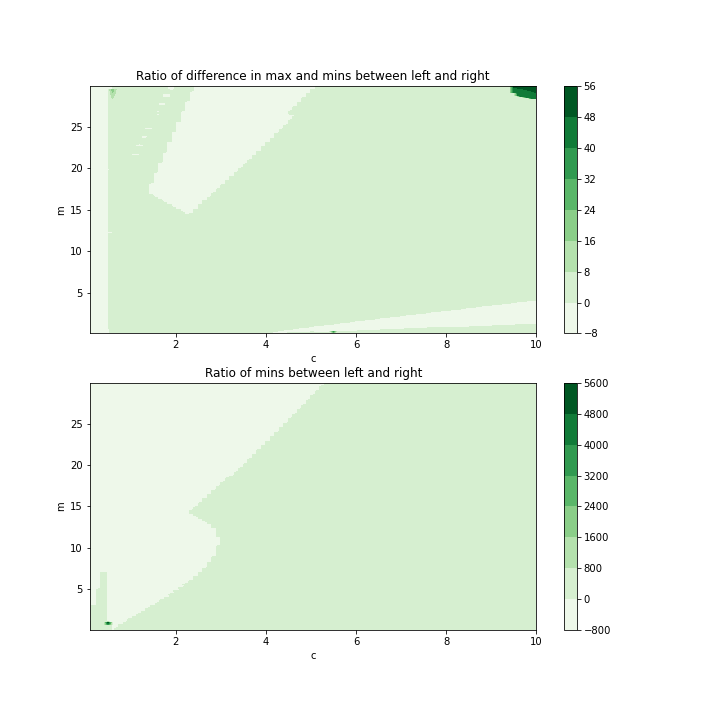

In [8]:

[cVals,mVals,maxLeft,minLeft,maxRight,minRight] = \
    makeDomain(allData,cPos,mPos, \
               maxButterflyPosLeft,minButterflyPosLeft, \
               maxButterflyPosRight,minButterflyPosRight)
[cGrid,mGrid] = numpy.meshgrid(cVals,mVals)

#fig = plt.figure()
#fig.subplots_adjust(left=0,bottom=0.0,top=1.0,right=1.0) #bottom=-3.0,top=1.0)
[numx,numy] = maxLeft.shape

ratios = numpy.zeros((numx,numy))
for nx in range(numx):
    for ny in range(numy):
        denominator = (maxRight[nx][ny]-minRight[nx][ny])
        if(numpy.fabs(denominator)<1.0e-6) :
            ratio = -0.5
        else:
            ratio = (maxLeft[nx][ny]-minLeft[nx][ny])/denominator
        ratios[nx,ny] = ratio
    
fig, axes = plt.subplots(2,1,figsize=(10,10))
cp = axes[0].contourf(cGrid,mGrid,ratios,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[0]) # Add a colorbar to a plot
axes[0].set_title('Ratio of difference in max and mins between left and right')
xlabel = axes[0].set_xlabel('c')
yLabel = axes[0].set_ylabel('m')

peligroso = numpy.zeros((numx,numy))
for nx in range(numx):
    for ny in range(numy):
        denominator = minRight[nx][ny]
        if((numpy.fabs(denominator)<1.0e-2) and (numpy.fabs(minLeft[nx][ny])<1.0e-2)) :
            ratio = -0.5
        elif(numpy.fabs(denominator)<1.0e-5) :
            ratio = -0.5
        else:
            ratio = minLeft[nx][ny]/denominator
        peligroso[nx,ny] = ratio

cp = axes[1].contourf(cGrid,mGrid,peligroso,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes[1]) # Add a colorbar to a plot
axes[1].set_title('Ratio of mins between left and right')
xlabel = axes[1].set_xlabel('c')
yLabel = axes[1].set_ylabel('m')


plt.show()

#plt.show()
##fig.savefig("approximation-c-1.1-mu-01-m-150.pdf", bbox_inches='tight')


<IPython.core.display.Javascript object>


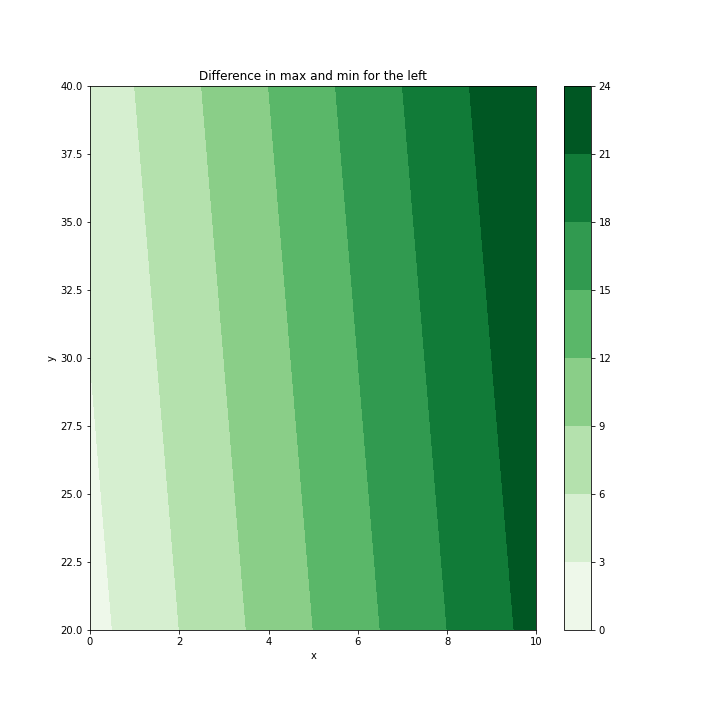

In [9]:
x = numpy.linspace(0,10,40)
y = numpy.linspace(20,40,40)
numX = len(x)
numY = len(y)
z = numpy.zeros((numY,numX))
for lupeX in range(numX):
    for lupeY in range(numY):
        z[lupeY,lupeX] = 0.1*y[lupeY]+2.0*x[lupeX]

fig, axes = plt.subplots(1,1,figsize=(10,10))
#axes[0][0].contour(cGrid,mGrid,maxLeft-minLeft)  #gist_yarg Greens BuGn
#cp = axes[0][0].imshow(maxLeft-minLeft, cmap='Greens', origin='lower', aspect='auto',
#           extent=[cGrid.min(), cGrid.max(), mGrid.min(), mGrid.max()])
cp = axes.contourf(x,y,z,
            extent=[x.min(), x.max(), y.min(), y.max()],
            cmap='Greens')  #gist_yarg Greens BuGn
fig.colorbar(cp,ax=axes) # Add a colorbar to a plot
axes.set_title('Difference in max and min for the left')
xlabel = axes.set_xlabel('x')
yLabel = axes.set_ylabel('y')
plt.show()